# **CUSTOMER CHURN PREDICTION**
Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score,precision_score,recall_score,f1_score

In [2]:
d=pd.read_csv('churn.csv')
d

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Top 5 Data Of Churn prediction**

In [3]:
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Sum Of Null Values**

In [5]:
d.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
d.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Shape Of the Dataset**

In [7]:
print("Training Data Shape:",d.shape)

Training Data Shape: (10000, 14)


**Distribution of Gender with Exited Status**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


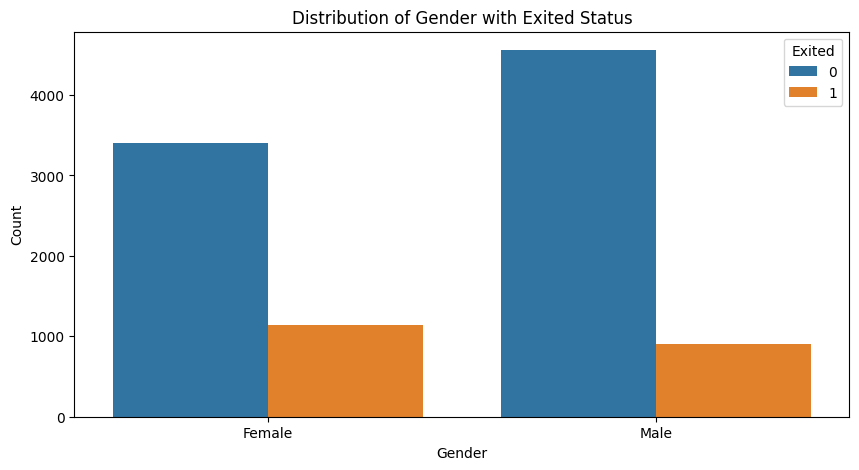

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Gender", hue="Exited", data=d, ax=ax)
ax.set_title("Distribution of Gender with Exited Status")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

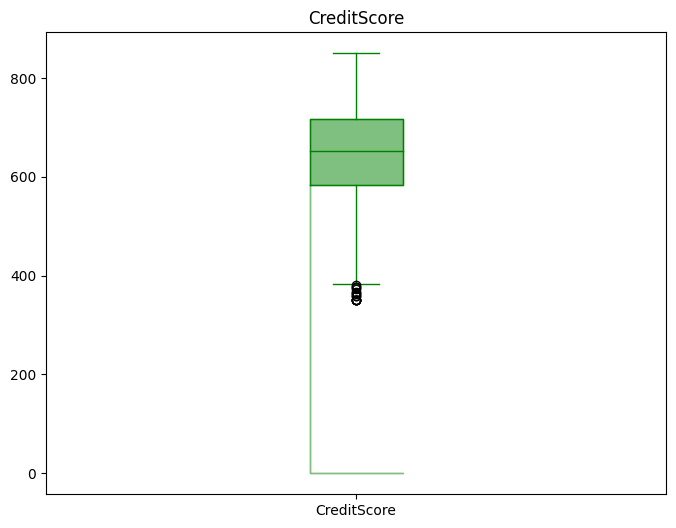

In [26]:
plt.figure(figsize=(8,6))
kde = d['CreditScore'].plot(kind='box', color='green')
plt.fill_between(kde.get_lines()[0].get_xdata(), kde.get_lines()[0].get_ydata(), color='green', alpha=0.5)
plt.title('CreditScore')
plt.show()

**Pie Chart To Describer the Exited Counts**

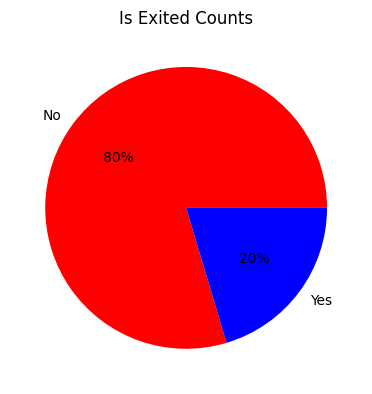

In [27]:
is_Exit= d["Exited"].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(is_Exit, labels=["No", "Yes"], autopct="%0.0f%%",colors=['red', 'blue'])
plt.title("Is Exited Counts")
plt.show()

**Age Distribution**

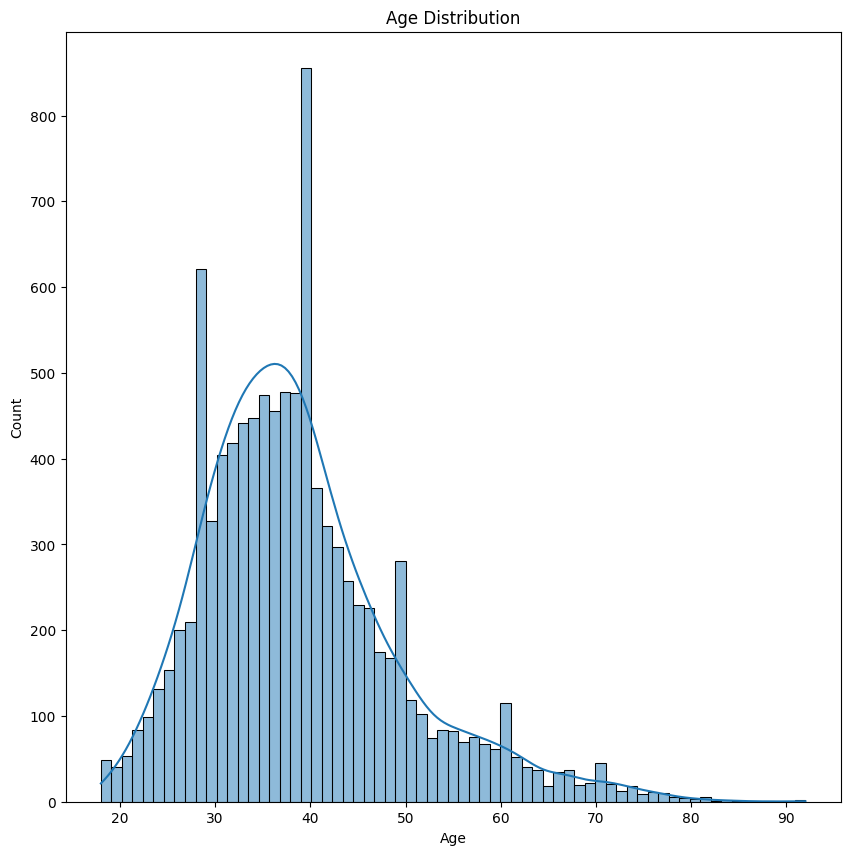

In [10]:

plt.figure(figsize=(10,10))
sns.histplot(data=d,x='Age',kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

**Drop The Unnecessary Columns And keep only necessary columns for Model Selection**

In [11]:
d = d.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

d['Balance'] = d['Balance'].astype(int)
d['EstimatedSalary'] = d['EstimatedSalary'].astype(int)

In [12]:
d['Balance_Salary_Ratio'] = d['Balance'] / d['EstimatedSalary']
d.drop(['Balance', 'EstimatedSalary'], axis=1, inplace=True)

In [13]:
x=d.drop('Exited',axis=1)
y=d['Exited']
x

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Balance_Salary_Ratio
0,619,France,Female,42,2,1,1,1,0.000000
1,608,Spain,Female,41,1,1,0,1,0.744673
2,502,France,Female,42,8,3,1,0,1.401375
3,699,France,Female,39,1,2,0,0,0.000000
4,850,Spain,Female,43,2,1,1,1,1.587047
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,2,1,0,0.000000
9996,516,France,Male,35,10,1,1,1,0.564106
9997,709,France,Female,36,7,1,0,1,0.000000
9998,772,Germany,Male,42,3,2,1,0,0.808231


**Convert The categorical Variable into Numerical Value**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d['Gender'] = le.fit_transform(d['Gender'])
d['Geography'] = le.fit_transform(d['Geography'])


In [15]:
d.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance_Salary_Ratio
0,619,0,0,42,2,1,1,1,1,0.000000
1,608,2,0,41,1,1,0,1,0,0.744673
2,502,0,0,42,8,3,1,0,1,1.401375
3,699,0,0,39,1,2,0,0,0,0.000000
4,850,2,0,43,2,1,1,1,0,1.587047


**Split the Data into Train And Test Data**

In [20]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
No_class = d[d["Exited"]==0]
yes_class = d[d["Exited"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Using the Random Forest Classifer calculate accuracy of the prediction**

In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred1=RFC.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.7644171779141105
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       410
           1       0.77      0.76      0.76       405

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



Text(45.722222222222214, 0.5, 'Truth')

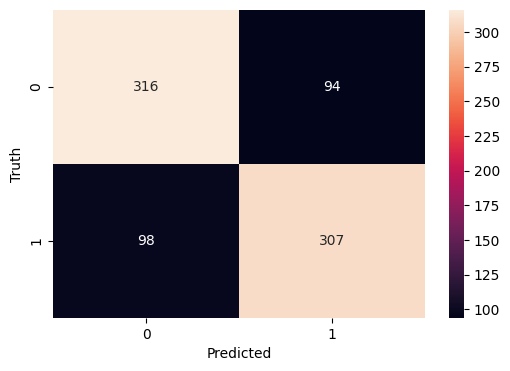

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')